Heart Stroke Prediction
========================
This project aims to predict the likelihood of a heart stroke using various machine learning models. The dataset used for this project is sourced from Kaggle and contains various health-related features.


In [37]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import janitor
import seaborn as sns

In [24]:
# Load the dataset
df = pd.read_csv('../00_raw_data/heart-stroke-dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data Preprocessing
===================


In [25]:
# Clean column names for standardization0
df = df.clean_names()
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [26]:
# descriptive statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [27]:
# Check the structure of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [28]:
# Convert age to the appropiate data type 
df['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [29]:
 # Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
# Replace missing values with the most frequent value
df['bmi'] = df['bmi'].fillna(df['bmi'].mode()[0])

In [32]:
# Check values and counts
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['residence_type'].value_counts())
print(df['smoking_status'].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [35]:
# Replacing the values in columns with numerical values 
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0}).astype(int)
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other': 2}).astype(int)
df['residence_type'] = df['residence_type'].replace({'Urban': 1, 'Rural': 0}).astype(int)
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 1, 'formerly smoked': 0, 'smokes': 2, 'Unknown': 3}).astype(int)
df['work_type'] = df['work_type'].replace({'Self-employed': 1, 'Private': 0, 'children': 2, 'Govt_job': 3, 'Never_worked': 4}).astype(int)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,1,1,0,202.21,28.7,1,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,1,1


Exploratory Data Analysis (EDA)
=========================

Bar plot - Count of Gender

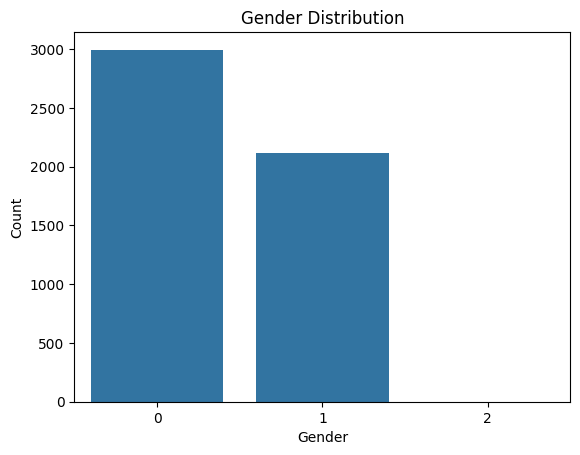

In [39]:
sns.countplot(x='gender', data = df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='residence_type', ylabel='count'>

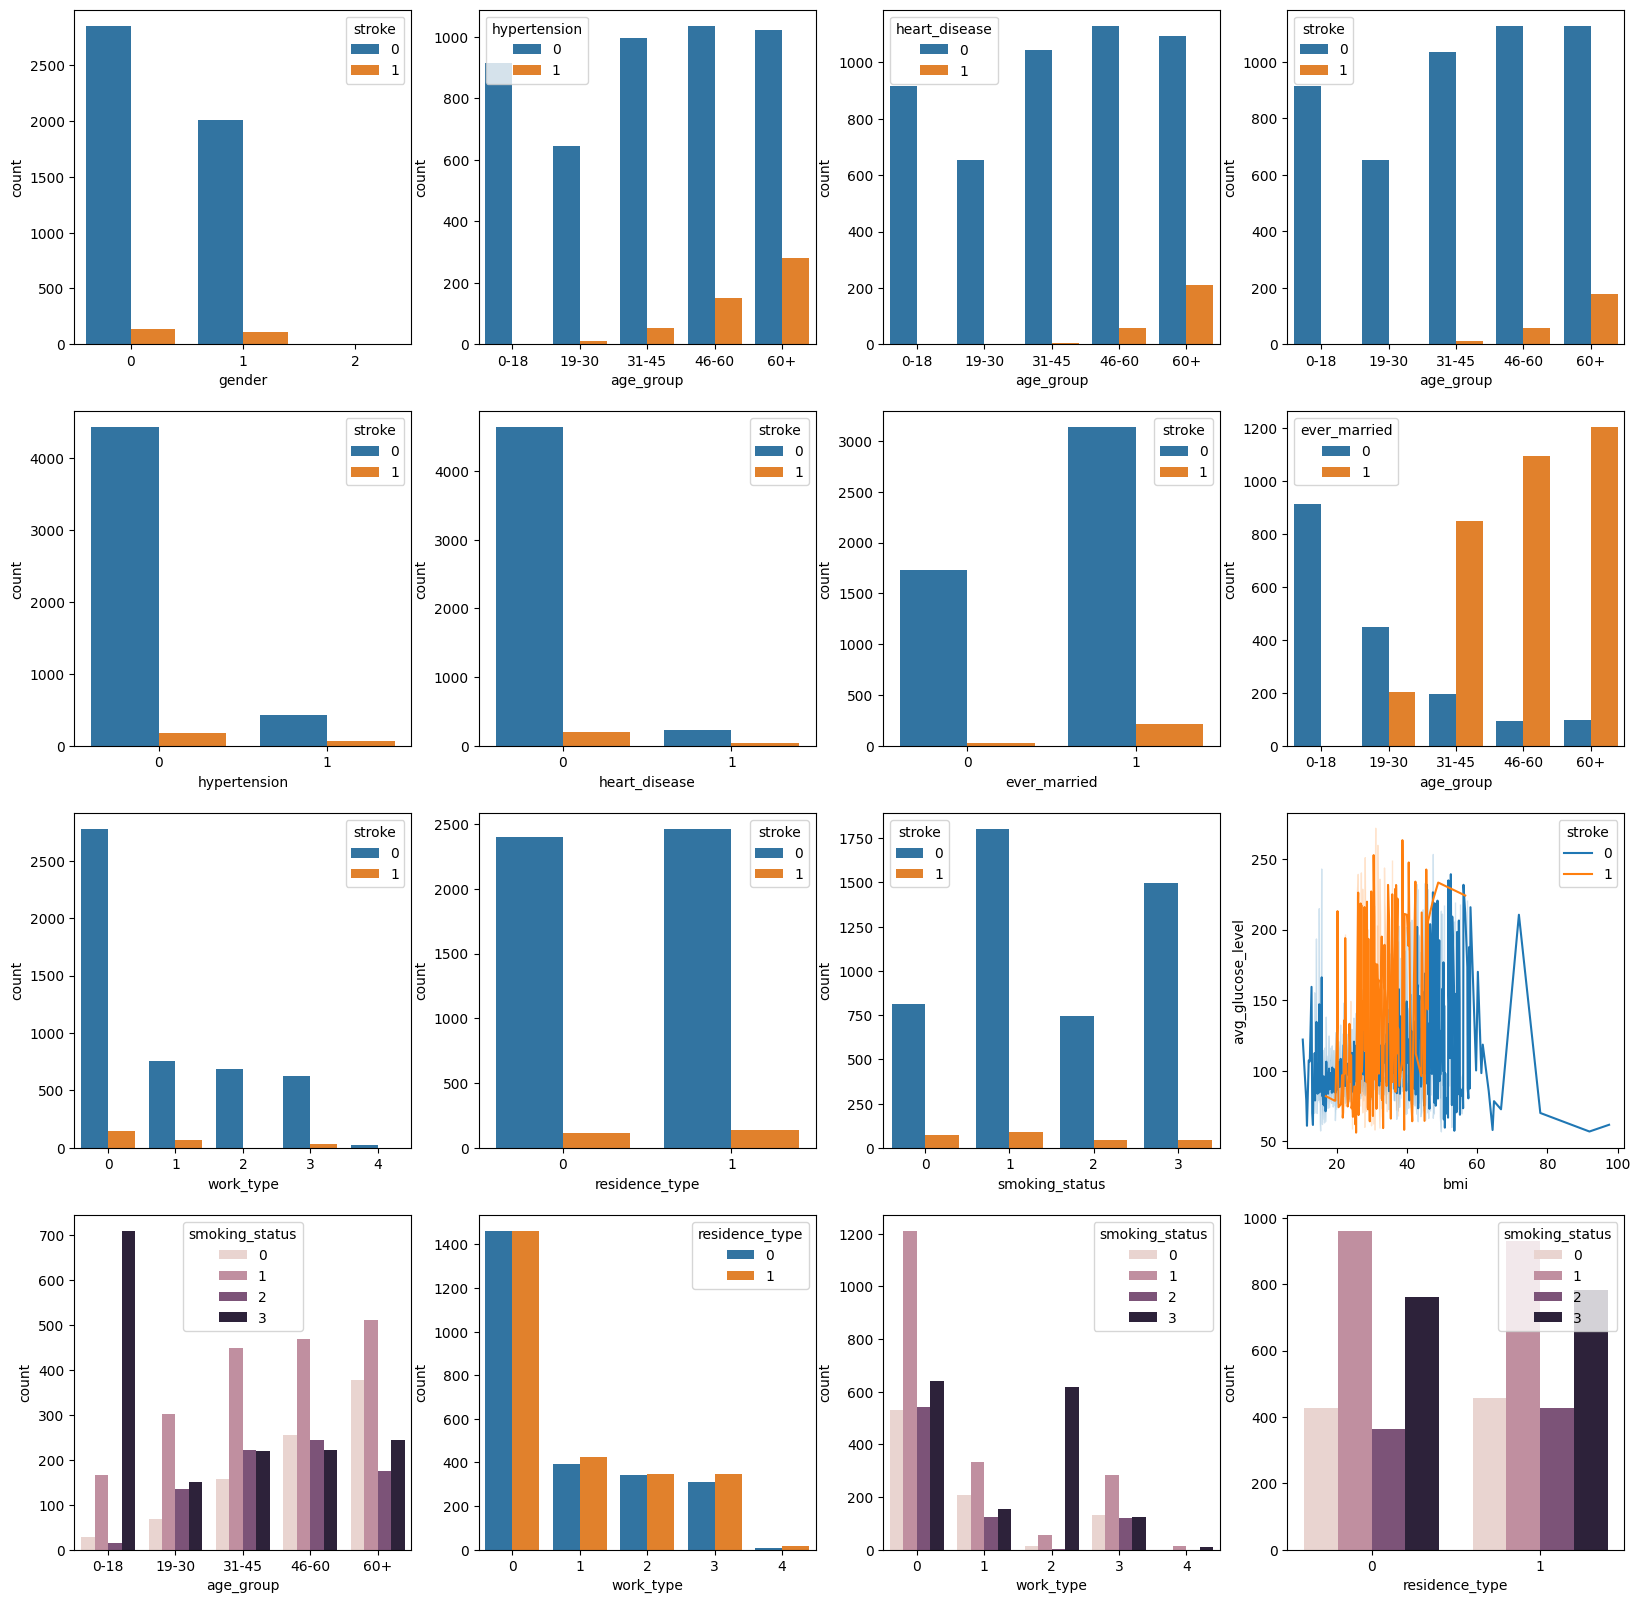

In [ ]:
# Age is a continous variable which would lead to too many bars or messy or unreadable plots

# Create binned age column
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], 
                         labels=['0-18', '19-30', '31-45', '46-60', '60+'])

fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age_group', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age_group', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age_group', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age_group', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age_group', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])